# 模拟退火算法:Simulated Annealing

### 0.一点点原理
1. 算法流程图
<img src = 'https://s1.ax1x.com/2018/12/17/F05AoT.png'>
2. 采纳概率的计算方程：$P(E_k) = 1/(1+e^{-Ek/T}）$

### 1. 使用模拟退火算法求解该函数：$f(x)=11sin(x)+7cos(5x)$的在$[-3,3]$区间的最大值

In [3]:
import numpy as np
import matplotlib.pyplot as plt

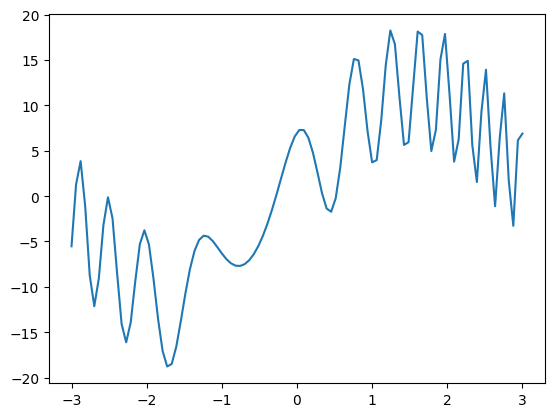

In [46]:
x = np.linspace(-3, 3, 100)
y = func(x)
plt.plot(x, y)

In [45]:
def func(x):
    return 12 * np.sin(x) + 7 * np.cos(5 * x + 4 * x ** 2)

In [47]:
def getMin(low, high, alpha, times):
    """
    模拟退火算法求解函数最大值
    :param low:定义域下限
    :param high: 定义域上限
    :param alpha: 温度降低系数
    :param times: 迭代次数
    :return: 最大值点
    """
    T = 1000  # 随机产生温度
    min_Temp = 1
    x = np.random.uniform(low, high, 1)[-1]

    while T > min_Temp:
        for i in np.arange(1, times, 1):
            new_x = np.random.uniform(low, high, 1)[-1]
            dE = func(new_x) - func(x)
            if dE < 0:
                x = new_x
            elif func(new_x) < func(x):
                if np.exp(-dE / T) > np.random.random():
                    x = new_x
        T = alpha * T
    return x

In [48]:
getMin(-3, 3, 0.95, 1000)

-1.706334045346869

In [49]:
def getMax(low, high, alpha, times):
    T = 1000  # 随机产生初始温度
    min_Temp = 1
    x = np.random.uniform(low, high, 1)[-1]
    while T > min_Temp:
        for _ in range(times):
            new_x = np.random.uniform(low, high, 1)[-1]
            dE = func(new_x) - func(x)
            if dE >= 0:
                x = new_x
            elif dE < 0:
                if np.exp(dE / T) > np.random.random():
                    x = new_x
        T = alpha * T
    return x

In [50]:
getMax(-3, 3, 0.95, 1000)

1.6315205297258366

In [51]:
func(getMax(-3, 3, 0.95, 1000))

15.160340064643641

### 2. 模拟退火算法求解$NP-Hard$问题